# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2021 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 2 - Classification
### @author: Amin Kabir - kabir@sfu.ca


In [54]:
# Load General Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
row_size = 2000
from sklearn.model_selection import train_test_split

##load all beats
apc_beats = loadmat('APC_BEATS.mat')['APC_BEATS'] 
lbbb_beats = loadmat('LBBB_BEATS.mat')['LBBB_BEATS']
normal_beats = loadmat('NORMAL_BEATS.mat')['NORMAL_BEATS']
pvc_beats = loadmat('PVC_BEATS.mat')['PVC_BEATS']
rbbb_beats = loadmat('RBBB_BEATS.mat')['RBBB_BEATS']

# # Importing the dataset (no header)
# df0 = pd.read_csv("multi_class\NORMAL_BEATS.mat", header=None)
# df1 = pd.read_csv("multi_class\NORMAL.mat", header=None)
# df2 = pd.read_csv("multi_class\EMG_2.csv", header=None)
# df3 = pd.read_csv("multi_class\EMG_3.csv", header=None)
# dataset = pd.concat([df0,df1,df2,df3], axis = 0)

# normal_beats = loadmat('NORMAL_BEATS.mat')['NORMAL_BEATS']
# normal = loadmat('NORMAL.mat')['NORMAL']
# dataset = pd.concat([normal_beats, normal], axis = 0)
# # Importing hand gestures images
# import matplotlib.image as mpimg
# img0 = mpimg.imread('EMG/0.jpg')
# img1 = mpimg.imread('EMG/1.jpg')
# img2 = mpimg.imread('EMG/2.jpg')
# img3 = mpimg.imread('EMG/3.jpg')

In [35]:
##test for loops
test = 3
feature1 = np.zeros(shape=(test,1))
# feature1[0,1] = 3

for i in range(0,test):
    feature1[i,0] = 1

In [39]:
## feature1: APC ground
apc = loadmat('APC.mat')['APC'] ##load normal apc ground signal
feature1 = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    feature1[i+row_size*0,0] = dtw(apc_beats[:,i],apc)
    feature1[i+row_size*1,0] = dtw(lbbb_beats[:,i],apc) 
    feature1[i+row_size*2,0] = dtw(normal_beats[:,i],apc) 
    feature1[i+row_size*3,0] = dtw(pvc_beats[:,i],apc) 
    feature1[i+row_size*4,0] = dtw(rbbb_beats[:,i],apc) 

In [40]:
## feature2: LBBB ground
lbbb = loadmat('LBBB.mat')['LBBB'] ##load normal apc ground signal
feature2 = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    feature2[i+row_size*0,0] = dtw(apc_beats[:,i],lbbb)
    feature2[i+row_size*1,0] = dtw(lbbb_beats[:,i],lbbb) 
    feature2[i+row_size*2,0] = dtw(normal_beats[:,i],lbbb) 
    feature2[i+row_size*3,0] = dtw(pvc_beats[:,i],lbbb) 
    feature2[i+row_size*4,0] = dtw(rbbb_beats[:,i],lbbb) 

In [41]:
## feature3: normal ground
normal = loadmat('NORMAL.mat')['NORMAL'] ##load normal apc ground signal
feature3 = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    feature3[i+row_size*0,0] = dtw(apc_beats[:,i],normal)
    feature3[i+row_size*1,0] = dtw(lbbb_beats[:,i],normal) 
    feature3[i+row_size*2,0] = dtw(normal_beats[:,i],normal) 
    feature3[i+row_size*3,0] = dtw(pvc_beats[:,i],normal) 
    feature3[i+row_size*4,0] = dtw(rbbb_beats[:,i],normal) 


In [42]:
## feature4: pvc ground
pvc = loadmat('PVC.mat')['PVC'] ##load normal apc ground signal
feature4 = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    feature4[i+row_size*0,0] = dtw(apc_beats[:,i],pvc)
    feature4[i+row_size*1,0] = dtw(lbbb_beats[:,i],pvc) 
    feature4[i+row_size*2,0] = dtw(normal_beats[:,i],pvc) 
    feature4[i+row_size*3,0] = dtw(pvc_beats[:,i],pvc) 
    feature4[i+row_size*4,0] = dtw(rbbb_beats[:,i],pvc) 


In [43]:
## feature5: rbbb ground
rbbb = loadmat('RBBB.mat')['RBBB'] ##load normal apc ground signal
feature5 = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    feature5[i+row_size*0,0] = dtw(apc_beats[:,i],rbbb)
    feature5[i+row_size*1,0] = dtw(lbbb_beats[:,i],rbbb) 
    feature5[i+row_size*2,0] = dtw(normal_beats[:,i],rbbb) 
    feature5[i+row_size*3,0] = dtw(pvc_beats[:,i],rbbb) 
    feature5[i+row_size*4,0] = dtw(rbbb_beats[:,i],rbbb) 


In [44]:
## class vector
class_pog = np.zeros(shape=(row_size*5,1))
for i in range(0,row_size):
    class_pog[i+row_size*0,0] = 0
    class_pog[i+row_size*1,0] = 1
    class_pog[i+row_size*2,0] = 2
    class_pog[i+row_size*3,0] = 3
    class_pog[i+row_size*4,0] = 4

In [51]:
##combined
poggers = np.concatenate((feature1, feature2, feature3, feature4, feature5, class_pog), axis = 1)
np.savetxt("part4results.csv", poggers, delimiter=",")

## PART 5

In [77]:
## split up data
all_feat = np.concatenate((feature1, feature2, feature3, feature4, feature5), axis = 1)

X_train, X_test, y_train, y_test = train_test_split(all_feat, class_pog, test_size = 0.2, random_state = 2)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

## Classification model

In [88]:
# Some Functions for Showing the Classifier Performance
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

# labels = ['feature1','feature2','feature3','feature4', feature5]
def classifier_performance(model,y_pred):
    # print('Classification Report: \n', classification_report(y_test,y_pred,target_names=labels))
    # Plot normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=labels,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
    plt.show()
    return

Confusion matrix, without normalization
[[344   2  31   2   9]
 [  1 389   4  15   0]
 [ 13  10 363  11   2]
 [  2  13   6 376   2]
 [ 11   2   3   1 388]]
Normalized confusion matrix
[[0.88659794 0.00515464 0.07989691 0.00515464 0.02319588]
 [0.00244499 0.95110024 0.00977995 0.03667482 0.        ]
 [0.03258145 0.02506266 0.90977444 0.02756892 0.00501253]
 [0.00501253 0.03258145 0.01503759 0.94235589 0.00501253]
 [0.02716049 0.00493827 0.00740741 0.00246914 0.95802469]]


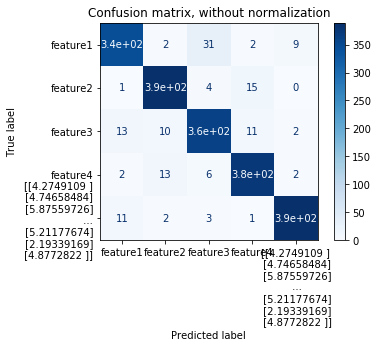

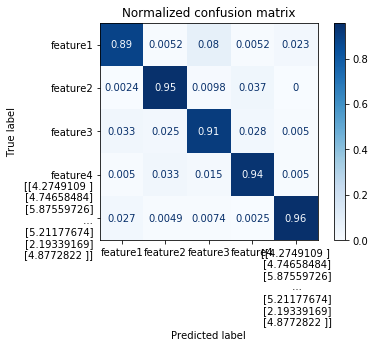

In [89]:
## K-Nearest Neighbour
# Import the class
from sklearn.neighbors import KNeighborsClassifier

# Instantiating the model (using the default parameters)
MODEL_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the Model
MODEL_KNN.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_KNN, open('Model_KNeighborsClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_KNN = MODEL_KNN.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_KNN,y_pred_KNN)

## Decision tree


Confusion matrix, without normalization
[[321   6  34   3  24]
 [  1 371  11  23   3]
 [ 29  13 320  22  15]
 [  3  25   7 364   0]
 [ 21   3   0   3 378]]
Normalized confusion matrix
[[0.82731959 0.01546392 0.08762887 0.00773196 0.06185567]
 [0.00244499 0.90709046 0.02689487 0.05623472 0.00733496]
 [0.0726817  0.03258145 0.80200501 0.05513784 0.03759398]
 [0.0075188  0.06265664 0.01754386 0.9122807  0.        ]
 [0.05185185 0.00740741 0.         0.00740741 0.93333333]]


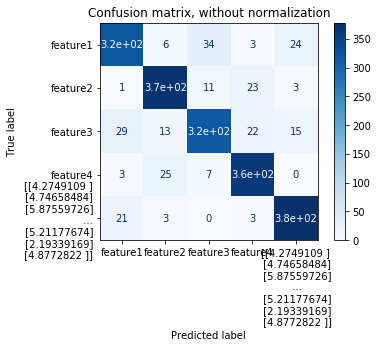

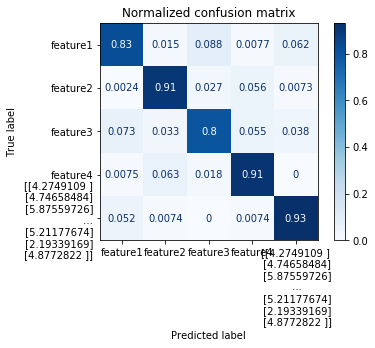

In [90]:
# Import the class
from sklearn.tree import DecisionTreeClassifier

# Instantiating the model (using the default parameters)
MODEL_DT = DecisionTreeClassifier()

# Train the Model
MODEL_DT.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_DT, open('DecisionTreeClassifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_DT = MODEL_DT.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_DT,y_pred_DT)

## Gaussian Naive Bayes

Confusion matrix, without normalization
[[ 99   3  23  30 233]
 [ 15 220  80  92   2]
 [ 84  12 241  43  19]
 [  6  56  19 318   0]
 [ 19   0  12   1 373]]
Normalized confusion matrix
[[0.25515464 0.00773196 0.05927835 0.07731959 0.60051546]
 [0.03667482 0.53789731 0.19559902 0.22493888 0.00488998]
 [0.21052632 0.03007519 0.60401003 0.10776942 0.04761905]
 [0.01503759 0.14035088 0.04761905 0.79699248 0.        ]
 [0.04691358 0.         0.02962963 0.00246914 0.92098765]]


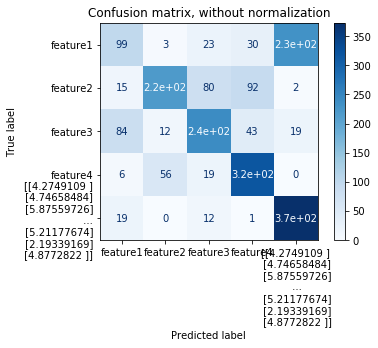

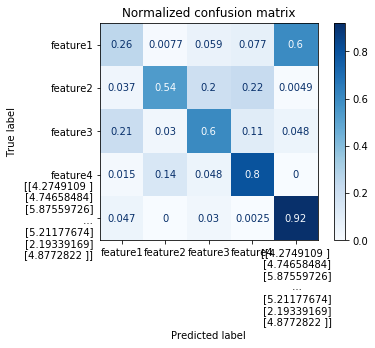

In [91]:
# Import the class
from sklearn.naive_bayes import GaussianNB

# Instantiating the model (using the default parameters)
MODEL_GNB = GaussianNB()

# Train the Model
MODEL_GNB.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_GNB, open('Model_GaussianNB.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_GNB = MODEL_GNB.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_GNB,y_pred_GNB)

## Support vector machine 

Confusion matrix, without normalization
[[321   3  54   2   8]
 [  1 375   6  25   2]
 [ 38  26 316  14   5]
 [  3  23   8 364   1]
 [100   1   1   1 302]]
Normalized confusion matrix
[[0.82731959 0.00773196 0.13917526 0.00515464 0.02061856]
 [0.00244499 0.91687042 0.01466993 0.06112469 0.00488998]
 [0.0952381  0.06516291 0.79197995 0.03508772 0.01253133]
 [0.0075188  0.05764411 0.02005013 0.9122807  0.00250627]
 [0.24691358 0.00246914 0.00246914 0.00246914 0.74567901]]


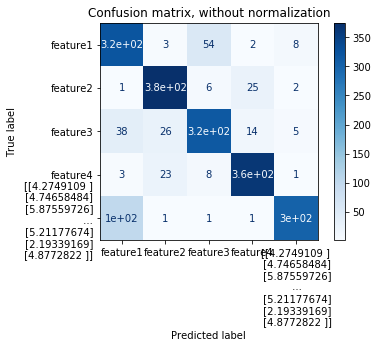

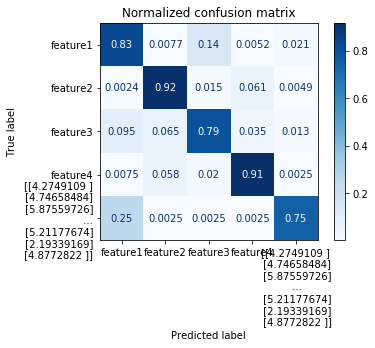

In [92]:
# Import the class
from sklearn.svm import SVC

# Instantiating the model (using the default parameters)
MODEL_SVM = SVC()

# Train the Model
MODEL_SVM.fit(X_train,y_train)

# Save the Trained Model
pickle.dump(MODEL_SVM, open('Model_SupportVectorClasifier.pkl', 'wb'))

# Predict the Trained Model on our Test data
y_pred_SVM = MODEL_SVM.predict(X_test)

# Print the Classification Report and Confusion Matrix
classifier_performance(MODEL_SVM,y_pred_SVM)